### **Regressão Polinomial**
- Valor médio (MEDV) em função do número de cômodos (RM)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("housing.csv", sep=",", encoding="iso-8859-1")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
x1 = df.iloc[:,0:1].values
print(x1)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [4]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

#### **Treino e Teste do Modelo de Machine Learning**

In [5]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=  0.3, random_state=10)

In [6]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [7]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

#### Pré Processamento

In [9]:
grau_polinomial = PolynomialFeatures(degree=2)

In [10]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[ 1.      ,  6.781   , 45.981961],
       [ 1.      ,  6.301   , 39.702601],
       [ 1.      ,  7.333   , 53.772889],
       ...,
       [ 1.      ,  6.593   , 43.467649],
       [ 1.      ,  5.986   , 35.832196],
       [ 1.      ,  6.854   , 46.977316]])

In [12]:
polinomial = LinearRegression()
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [13]:
previsores_treino = polinomial.predict(x_poly)

In [14]:
polinomial.coef_

array([      0.        , -612855.9853993 ,   63229.97001796])

In [15]:
polinomial.intercept_

1792479.3795213934

### **Equação**
- Valor = 1792479.37 - 612855.98 * RM + 63229.97 * RMˆ2

In [16]:
numeros = np.linspace(3,9.84,342)
numeros

array([3.        , 3.02005865, 3.0401173 , 3.06017595, 3.0802346 ,
       3.10029326, 3.12035191, 3.14041056, 3.16046921, 3.18052786,
       3.20058651, 3.22064516, 3.24070381, 3.26076246, 3.28082111,
       3.30087977, 3.32093842, 3.34099707, 3.36105572, 3.38111437,
       3.40117302, 3.42123167, 3.44129032, 3.46134897, 3.48140762,
       3.50146628, 3.52152493, 3.54158358, 3.56164223, 3.58170088,
       3.60175953, 3.62181818, 3.64187683, 3.66193548, 3.68199413,
       3.70205279, 3.72211144, 3.74217009, 3.76222874, 3.78228739,
       3.80234604, 3.82240469, 3.84246334, 3.86252199, 3.88258065,
       3.9026393 , 3.92269795, 3.9427566 , 3.96281525, 3.9828739 ,
       4.00293255, 4.0229912 , 4.04304985, 4.0631085 , 4.08316716,
       4.10322581, 4.12328446, 4.14334311, 4.16340176, 4.18346041,
       4.20351906, 4.22357771, 4.24363636, 4.26369501, 4.28375367,
       4.30381232, 4.32387097, 4.34392962, 4.36398827, 4.38404692,
       4.40410557, 4.42416422, 4.44422287, 4.46428152, 4.48434

In [17]:
numeros.shape

(342,)

In [18]:
valor = 1792479.37 - 612855.98*numeros + 63229.97*numeros**2
valor

array([ 522981.16      ,  518323.38372919,  513716.48854961,
        509160.47446125,  504655.34146412,  500201.08955822,
        495797.71874354,  491445.22902008,  487143.62038786,
        482892.89284686,  478693.04639708,  474544.08103853,
        470445.99677121,  466398.79359512,  462402.47151025,
        458457.0305166 ,  454562.47061419,  450718.791803  ,
        446925.99408303,  443184.07745429,  439493.04191678,
        435852.88747049,  432263.61411543,  428725.2218516 ,
        425237.71067899,  421801.0805976 ,  418415.33160745,
        415080.46370852,  411796.47690081,  408563.37118434,
        405381.14655908,  402249.80302506,  399169.34058226,
        396139.75923068,  393161.05897034,  390233.23980122,
        387356.30172332,  384530.24473665,  381755.06884121,
        379030.77403699,  376357.360324  ,  373734.82770224,
        371163.1761717 ,  368642.40573239,  366172.5163843 ,
        363753.50812744,  361385.38096181,  359068.1348874 ,
        356801.76990422,

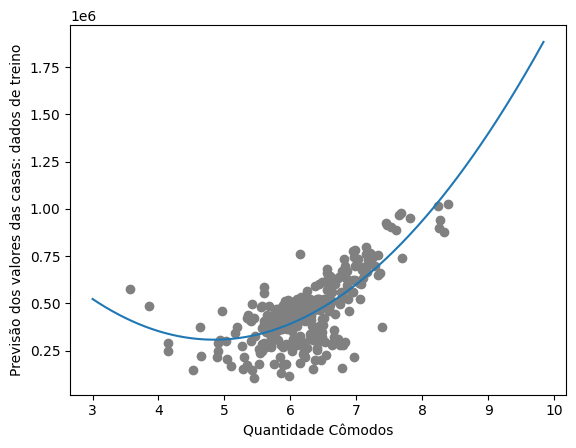

In [19]:
plt.scatter(x_treino, y_treino, c = 'gray')
plt.xlabel('Quantidade Cômodos')
plt.ylabel('Previsão dos valores das casas: dados de treino')
plt.plot(numeros, valor);

### **Fazendo previsões para valores distintos**

In [24]:
comodos = 5
valor = 1792479.37 - 612855.98*comodos + 63229.97*comodos**2
valor

308948.7200000002

### **Coeficiente de Determinação dados de treino**

In [25]:
polinomial.score(x_poly, y_treino)

0.5710421584052014

### Teste

In [26]:
numeros2 = np.linspace(3,8.88,147)
numeros2

array([3.        , 3.04027397, 3.08054795, 3.12082192, 3.16109589,
       3.20136986, 3.24164384, 3.28191781, 3.32219178, 3.36246575,
       3.40273973, 3.4430137 , 3.48328767, 3.52356164, 3.56383562,
       3.60410959, 3.64438356, 3.68465753, 3.72493151, 3.76520548,
       3.80547945, 3.84575342, 3.8860274 , 3.92630137, 3.96657534,
       4.00684932, 4.04712329, 4.08739726, 4.12767123, 4.16794521,
       4.20821918, 4.24849315, 4.28876712, 4.3290411 , 4.36931507,
       4.40958904, 4.44986301, 4.49013699, 4.53041096, 4.57068493,
       4.6109589 , 4.65123288, 4.69150685, 4.73178082, 4.77205479,
       4.81232877, 4.85260274, 4.89287671, 4.93315068, 4.97342466,
       5.01369863, 5.0539726 , 5.09424658, 5.13452055, 5.17479452,
       5.21506849, 5.25534247, 5.29561644, 5.33589041, 5.37616438,
       5.41643836, 5.45671233, 5.4969863 , 5.53726027, 5.57753425,
       5.61780822, 5.65808219, 5.69835616, 5.73863014, 5.77890411,
       5.81917808, 5.85945205, 5.89972603, 5.94      , 5.98027

In [27]:
numeros2.shape

(147,)

In [31]:
valor2 = 1792479.37 - 612855.98*numeros2 + 63229.97*numeros2**2
valor2

array([ 522981.16      ,  513680.70608923,  504585.36929937,
        495695.14963044,  487010.04708243,  478530.06165534,
        470255.19334917,  462185.44216392,  454320.80809959,
        446661.29115617,  439206.89133368,  431957.60863211,
        424913.44305146,  418074.39459173,  411440.46325292,
        405011.64903504,  398787.95193807,  392769.37196202,
        386955.90910689,  381347.56337268,  375944.33475939,
        370746.22326702,  365753.22889558,  360965.35164505,
        356382.59151544,  352004.94850676,  347832.42261899,
        343865.01385214,  340102.72220622,  336545.54768121,
        333193.49027713,  330046.54999396,  327104.72683171,
        324368.02079039,  321836.43186999,  319509.9600705 ,
        317388.60539194,  315472.36783429,  313761.24739757,
        312255.24408177,  310954.35788688,  309858.58881292,
        308967.93685988,  308282.40202776,  307801.98431655,
        307526.68372627,  307456.50025691,  307591.43390847,
        307931.48468095,

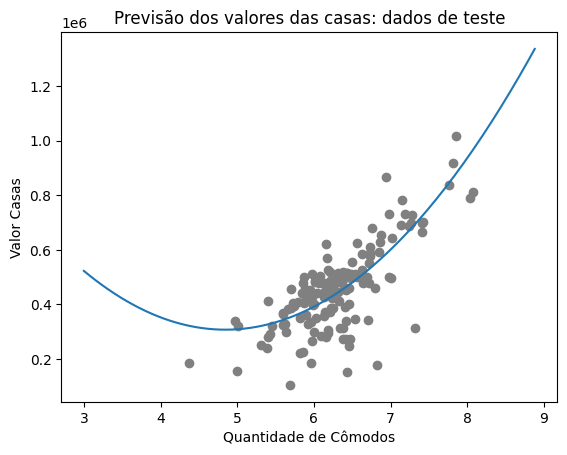

In [34]:
plt.scatter(x_teste, y_teste, c='gray')
plt.xlabel('Quantidade de Cômodos')
plt.ylabel('Valor Casas')
plt.title('Previsão dos valores das casas: dados de teste')
plt.plot(numeros2, valor2);

In [35]:
x_poly_teste = grau_polinomial.fit_transform(X=x_teste)
x_poly_teste

array([[ 1.      ,  6.02    , 36.2404  ],
       [ 1.      ,  6.127   , 37.540129],
       [ 1.      ,  6.182   , 38.217124],
       [ 1.      ,  6.373   , 40.615129],
       [ 1.      ,  6.431   , 41.357761],
       [ 1.      ,  6.453   , 41.641209],
       [ 1.      ,  6.849   , 46.908801],
       [ 1.      ,  6.127   , 37.540129],
       [ 1.      ,  6.487   , 42.081169],
       [ 1.      ,  6.38    , 40.7044  ],
       [ 1.      ,  6.209   , 38.551681],
       [ 1.      ,  6.211   , 38.576521],
       [ 1.      ,  6.976   , 48.664576],
       [ 1.      ,  5.877   , 34.539129],
       [ 1.      ,  5.454   , 29.746116],
       [ 1.      ,  6.153   , 37.859409],
       [ 1.      ,  6.242   , 38.962564],
       [ 1.      ,  6.176   , 38.142976],
       [ 1.      ,  6.151   , 37.834801],
       [ 1.      ,  6.417   , 41.177889],
       [ 1.      ,  7.014   , 49.196196],
       [ 1.      ,  5.012   , 25.120144],
       [ 1.      ,  5.981   , 35.772361],
       [ 1.      ,  6.715   , 45.0

In [36]:
polinomial_teste = LinearRegression()

In [37]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

### Coeficiente de Determinação dados teste

In [38]:
polinomial_teste.score(x_poly_teste, y_teste)

0.5822364482036412

In [39]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)
previsoes_teste

array([392348.76531239, 410384.85618815, 420029.37083818, 455492.42380228,
       466866.91151932, 471255.1752055 , 557185.07752902, 410384.85618815,
       478116.87850714, 456850.23656989, 424856.79136021, 425216.8102042 ,
       587528.66481083, 369743.57688925, 312916.09780922, 414912.46349299,
       430840.00017975, 418964.91354032, 414562.1732036 , 464095.51452886,
       596870.77098167, 269568.49058563, 386013.63195249, 526635.58866417,
       393993.70585985, 544463.90748722, 444400.06416859, 348433.49267811,
       823547.55918298, 385210.66072138, 459773.67338787, 494644.49558225,
       559759.75520392, 410731.12086874, 701993.66424855, 425396.94542647,
       579514.03315091, 376984.05058958, 334475.1326964 , 522425.8451871 ,
       467462.92090767, 465875.23987575, 664039.44655066, 492340.12076485,
       806347.48001763, 655200.06828797, 465677.15714758, 335659.31954153,
       445155.99686836, 439705.88652817, 418256.95267874, 360916.72324576,
       366267.87916928, 3

### Métricas

In [40]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

75949.23691059626

In [41]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

10317172227.873236

In [42]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

101573.48191271792

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.